Importing libs

In [3]:
from sklearn import datasets
from sklearn.preprocessing import OneHotEncoder
from sklearn.model_selection import train_test_split
from keras.models import Sequential
from keras.layers import Dense

import matplotlib.pyplot as plt

Matplotlib is building the font cache; this may take a moment.


Loading and processing the dataset

Attributes:

* sepal length in cm
* sepal width in cm
* petal length in cm
* petal width in cm

Classes:

* Iris-Setosa
* Iris-Versicolour 
* Iris-Virginica



In [4]:
iris_dataset = datasets.load_iris()
X = iris_dataset.data[:, :]
y = iris_dataset.target.reshape(-1, 1)

encoder = OneHotEncoder(sparse = False)
y = encoder.fit_transform(y)

Splitting the dataset

In [5]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2)

Building and training the ANN

In [6]:
ann = Sequential()
ann.add(Dense(10, activation = 'relu', input_shape = (4,)))
ann.add(Dense(3, activation = 'softmax')) # output layer

ann.compile(optimizer = 'adam', loss = 'categorical_crossentropy', metrics = ['accuracy'])
ann.fit(X_train, y_train, batch_size = 5, epochs = 150)

Epoch 1/150
24/24 [==============================] - 48s 3ms/step - loss: 1.5933 - accuracy: 0.6755
Epoch 2/150
24/24 [==============================] - 0s 3ms/step - loss: 1.5858 - accuracy: 0.6382
Epoch 3/150
24/24 [==============================] - 0s 2ms/step - loss: 1.3619 - accuracy: 0.6666
Epoch 4/150
24/24 [==============================] - 0s 3ms/step - loss: 1.0063 - accuracy: 0.7388
Epoch 5/150
24/24 [==============================] - 0s 2ms/step - loss: 1.0098 - accuracy: 0.6489
Epoch 6/150
24/24 [==============================] - 0s 3ms/step - loss: 0.9942 - accuracy: 0.5763
Epoch 7/150
24/24 [==============================] - 0s 3ms/step - loss: 0.8156 - accuracy: 0.7166
Epoch 8/150
24/24 [==============================] - 0s 2ms/step - loss: 0.7811 - accuracy: 0.6987
Epoch 9/150
24/24 [==============================] - 0s 2ms/step - loss: 0.7788 - accuracy: 0.6608
Epoch 10/150
24/24 [==============================] - 0s 2ms/step - loss: 0.7405 - accuracy: 0.6711
Epoch 11

Evaluating the ANN

In [7]:
test_results = ann.evaluate(X_test, y_test)

print('Accuracy: ', test_results[1])

1/1 [==============================] - 2s 2s/step - loss: 0.1328 - accuracy: 0.9667
Accuracy:  0.9666666388511658


Visualizing the dataset

* Since we cannot visualize 4 dimensions we will ignore the sepal width

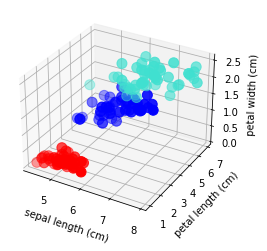

In [8]:
fig = plt.figure()
plot3d = fig.add_subplot(projection='3d')
clusters = iris_dataset.target

plot3d.scatter(X[clusters == 0, 0], X[clusters == 0, 2], X[clusters == 0, 3], s = 100, c = 'red', label = 'Iris-Setosa')
plot3d.scatter(X[clusters == 1, 0], X[clusters == 1, 2], X[clusters == 1, 3], s = 100, c = 'blue', label = 'Iris-Versicolour')
plot3d.scatter(X[clusters == 2, 0], X[clusters == 2, 2], X[clusters == 2, 3], s = 100, c = 'turquoise', label = 'Iris-Virginica')

plot3d.set_xlabel('sepal length (cm)')
plot3d.set_ylabel('petal length (cm)')
plot3d.set_zlabel('petal width (cm)')

plt.show()